In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from decimal import Decimal

%store -r BZGB

SAPGB = pd.read_excel(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\SAP_GB_20180101-20230122.xlsx", sheet_name='System Average Price')

SAPGBdata = pd.DataFrame({"GB Gas SAP [p/kWh]": SAPGB.iloc[1097:1827,1]}).astype(float)
SAPGBdata["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "GB Gas SAP [p/kWh]"]

SAPGBdata = SAPGBdata.reindex(columns=NewOrder)

SAPGBdata = SAPGBdata.reset_index()
del SAPGBdata['index']

print(SAPGBdata.dtypes)
print(SAPGBdata)

Date                  datetime64[ns]
GB Gas SAP [p/kWh]           float64
dtype: object
          Date  GB Gas SAP [p/kWh]
0   2021-01-01              1.9499
1   2021-01-02              1.9578
2   2021-01-03              1.9439
3   2021-01-04              2.0391
4   2021-01-05              1.8698
..         ...                 ...
725 2022-12-27              6.4625
726 2022-12-28              5.8369
727 2022-12-29              5.7103
728 2022-12-30              5.8352
729 2022-12-31              5.9093

[730 rows x 2 columns]


In [2]:
EURGBP = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\EUR_GBP.csv")

Forex = pd.DataFrame()
Forex["GBP/EUR"] = EURGBP.iloc[4976:5706,1]
Forex = Forex.reset_index()
del Forex['index']

SAPGBdatapc = pd.DataFrame({"GB Gas SAP [p/kWh]": SAPGB.iloc[1:731,1]}).astype(float)
SAPGBdatapc["Date"] = pd.date_range(start="1/1/2018", periods=730, freq="D")

NewOrder = ["Date", "GB Gas SAP [p/kWh]"]

SAPGBdatapc = SAPGBdatapc.reindex(columns=NewOrder)

SAPGBdatapc = SAPGBdatapc.reset_index()
del SAPGBdatapc['index']

print(SAPGBdatapc.dtypes)
print(SAPGBdatapc)

Date                  datetime64[ns]
GB Gas SAP [p/kWh]           float64
dtype: object
          Date  GB Gas SAP [p/kWh]
0   2018-01-01              1.7083
1   2018-01-02              1.7331
2   2018-01-03              1.7663
3   2018-01-04              1.7719
4   2018-01-05              1.7601
..         ...                 ...
725 2019-12-27              0.9823
726 2019-12-28              1.0317
727 2019-12-29              1.0882
728 2019-12-30              1.0687
729 2019-12-31              1.0140

[730 rows x 2 columns]


In [3]:
Forex["Date"] = pd.DataFrame({'Date': pd.date_range(start="1/1/2018", periods=730, freq="D")})
NewOrder = ["Date", "GBP/EUR"]
Forex = Forex.reindex(columns=NewOrder)

SAPGBdatapc["GB Gas SAP [GBP/MWh]"] = SAPGBdatapc["GB Gas SAP [p/kWh]"]/100*1000
SAPGBdatapc["GB Gas SAP [EUR/MWh]"] = SAPGBdatapc["GB Gas SAP [GBP/MWh]"]/Forex["GBP/EUR"]

print(SAPGBdatapc.dtypes)
print(SAPGBdatapc.to_string())

Date                    datetime64[ns]
GB Gas SAP [p/kWh]             float64
GB Gas SAP [GBP/MWh]           float64
GB Gas SAP [EUR/MWh]           float64
dtype: object
          Date  GB Gas SAP [p/kWh]  GB Gas SAP [GBP/MWh]  GB Gas SAP [EUR/MWh]
0   2018-01-01              1.7083                17.083             19.254308
1   2018-01-02              1.7331                17.331             19.483323
2   2018-01-03              1.7663                17.663             19.926670
3   2018-01-04              1.7719                17.719             19.885975
4   2018-01-05              1.7601                17.601             19.802437
5   2018-01-06              1.7186                17.186             19.335531
6   2018-01-07              1.8170                18.170             20.442604
7   2018-01-08              1.7993                17.993             20.351080
8   2018-01-09              1.7734                17.734             20.090631
9   2018-01-10              1.7862      

In [4]:
SAPpc = pd.DataFrame()

SAPpc["SAP 2018"] = SAPGBdatapc.loc[:364, "GB Gas SAP [EUR/MWh]"]

SAP2019 = pd.DataFrame()
SAP2019 = SAPGBdatapc.loc[365:, "GB Gas SAP [EUR/MWh]"]
SAP2019 = SAP2019.reset_index()
del SAP2019['index']

SAPpc["SAP 2019"] = SAP2019
print(SAPpc)

SAPpc["Mean SAP [EUR/MWh]"] = SAPpc.loc[:, ["SAP 2018", "SAP 2019"]].mean(axis = 1).round(2)
SAPpc["Max SAP [EUR/MWh]"] = SAPpc.loc[:, ["SAP 2018", "SAP 2019"]].max(axis = 1)
SAPpc["Min SAP [EUR/MWh]"] = SAPpc.loc[:, ["SAP 2018", "SAP 2019"]].min(axis = 1)
del SAPpc["SAP 2018"], SAPpc["SAP 2019"]

SAPpc = pd.concat([SAPpc.iloc[:,:], SAPpc.iloc[:,:]], ignore_index=True)

print(SAPpc.to_string())


      SAP 2018   SAP 2019
0    19.254308  19.135188
1    19.483323  22.698386
2    19.926670  22.572859
3    19.885975  22.901942
4    19.802437  22.607459
..         ...        ...
360  23.352170  11.538823
361  22.677877  12.119112
362  22.005472  12.782803
363  22.001041  12.542250
364  18.605301  11.918195

[365 rows x 2 columns]
     Mean SAP [EUR/MWh]  Max SAP [EUR/MWh]  Min SAP [EUR/MWh]
0                 19.19          19.254308          19.135188
1                 21.09          22.698386          19.483323
2                 21.25          22.572859          19.926670
3                 21.39          22.901942          19.885975
4                 21.20          22.607459          19.802437
5                 20.63          21.922923          19.335531
6                 20.80          21.163620          20.442604
7                 21.19          22.030688          20.351080
8                 21.13          22.174769          20.090631
9                 21.16          22.181303  

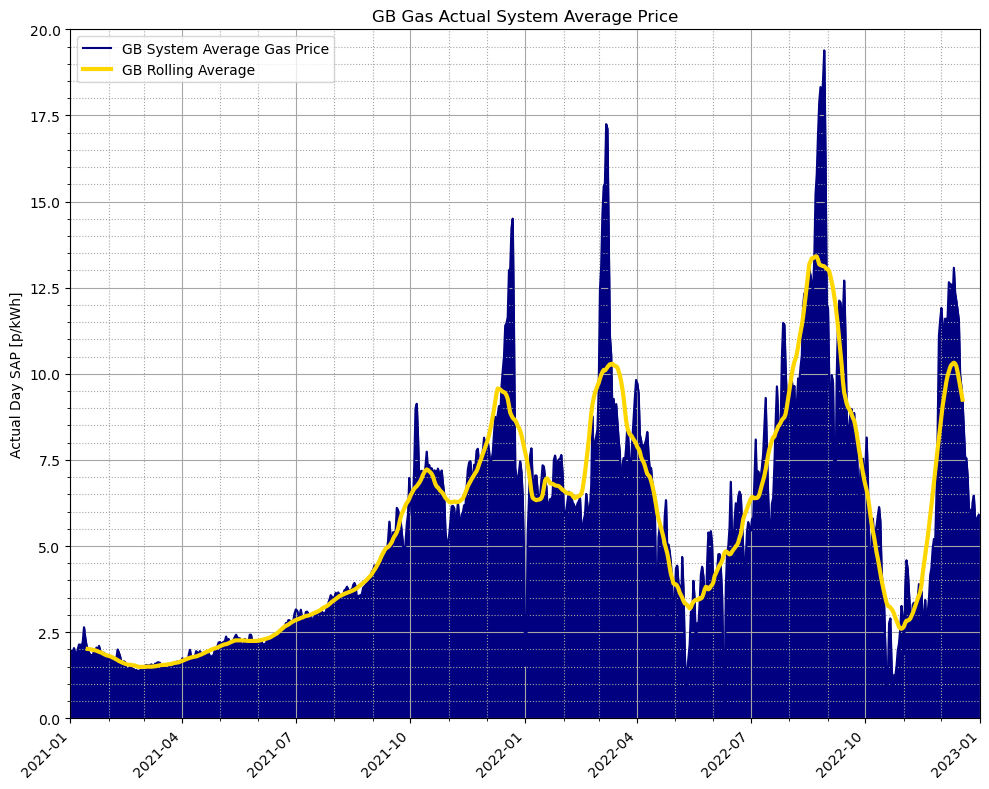

In [5]:
# Plotting SAP in [p/kWh] of gas against date 
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('GB Gas Actual System Average Price')
plt.ylabel('Actual Day SAP [p/kWh]')

ax.plot(SAPGBdata["Date"], SAPGBdata["GB Gas SAP [p/kWh]"], color = "navy", label="GB System Average Gas Price")
ax.plot(SAPGBdata["Date"], SAPGBdata["GB Gas SAP [p/kWh]"].rolling(28,  center=True).mean(), linewidth=3, color = "gold", label="GB Rolling Average")
plt.fill_between(SAPGBdata["Date"], SAPGBdata["GB Gas SAP [p/kWh]"].astype(float), color="navy")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 20)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [6]:
# Converting Gas SAP from [p/kWh] into [EUR/MWh] using ECB exchange rate
%store -r BZGB

EURGBP = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\EUR_GBP.csv")

Forex = pd.DataFrame()
Forex["GBP/EUR"] = EURGBP.iloc[5963:6693,1]
Forex = Forex.reset_index()
del Forex['index']

Forex["Date"] = pd.DataFrame({'Date': pd.date_range(start="1/1/2021", periods=730, freq="D")})
NewOrder = ["Date", "GBP/EUR"]
Forex = Forex.reindex(columns=NewOrder)

CompGasGB = pd.DataFrame({'Date': pd.date_range(start="1/1/2021", periods=730, freq="D")})
CompGasGB["GB Gas SAP [GBP/MWh]"] = SAPGBdata["GB Gas SAP [p/kWh]"]/100*1000
CompGasGB["GB Gas SAP [EUR/MWh]"] = CompGasGB["GB Gas SAP [GBP/MWh]"]/Forex["GBP/EUR"]


CompGasGB["GB DAEP [EUR/MWh]"] = BZGB["BZN|GB"].astype(float)
print(CompGasGB.dtypes)
print(CompGasGB.to_string())

Date                    datetime64[ns]
GB Gas SAP [GBP/MWh]           float64
GB Gas SAP [EUR/MWh]           float64
GB DAEP [EUR/MWh]              float64
dtype: object
          Date  GB Gas SAP [GBP/MWh]  GB Gas SAP [EUR/MWh]  GB DAEP [EUR/MWh]
0   2021-01-01                19.499             21.688931              68.40
1   2021-01-02                19.578             21.776804              71.54
2   2021-01-03                19.439             21.622193              65.27
3   2021-01-04                20.391             22.616460              67.32
4   2021-01-05                18.698             20.698969              67.40
5   2021-01-06                18.528             20.442434             160.07
6   2021-01-07                20.063             22.245260             101.79
7   2021-01-08                21.419             23.765090             115.46
8   2021-01-09                21.392             23.735132              74.13
9   2021-01-10                20.881             2

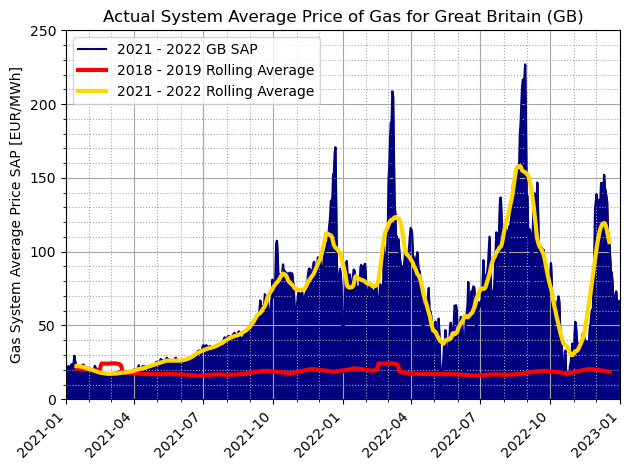

In [7]:
# Plotting SAP in [EUR/MWh] of gas against date 
fig, ax = plt.subplots()
#fig.set_figheight(8)
#fig.set_figwidth(10)

plt.title('Actual System Average Price of Gas for Great Britain (GB)')
plt.ylabel('Gas System Average Price SAP [EUR/MWh]')

plt.fill_between(CompGasGB["Date"], CompGasGB["GB Gas SAP [EUR/MWh]"].astype(float), color="navy")
ax.plot(CompGasGB["Date"], CompGasGB["GB Gas SAP [EUR/MWh]"].astype(float), color = "navy", label="2021 - 2022 GB SAP")
ax.plot(CompGasGB["Date"], SAPpc["Mean SAP [EUR/MWh]"].rolling(28,  center=True).mean(), linewidth=3, color = "red", label="2018 - 2019 Rolling Average")
ax.plot(CompGasGB["Date"], CompGasGB["GB Gas SAP [EUR/MWh]"].rolling(28,  center=True).mean(), linewidth=3, color = "gold", label="2021 - 2022 Rolling Average")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 250)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

rho: 0.9245203350562512
p: 3.3744738354741087e-307


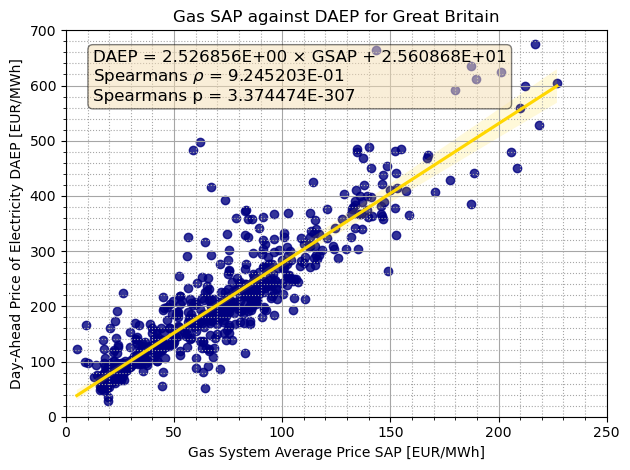

In [8]:
# Comparing Gas SAP and DAEP for Great Britain
CompGasGB

fig, ax = plt.subplots()
#fig.set_figheight(6)
#fig.set_figwidth(8)

rhoSAP_BZNGB, pSAP_BZNGB = spearmanr(CompGasGB["GB Gas SAP [EUR/MWh]"], CompGasGB["GB DAEP [EUR/MWh]"])

sns.regplot(x=CompGasGB["GB Gas SAP [EUR/MWh]"], y=CompGasGB["GB DAEP [EUR/MWh]"], scatter = True,
            ci = 100, fit_reg = True, scatter_kws = {"color": "navy"}, line_kws = {"color": "gold"})

slope, intercept, r, CompGasGB, sterr = scipy.stats.linregress(x=CompGasGB["GB Gas SAP [EUR/MWh]"],
                                                               y=CompGasGB["GB DAEP [EUR/MWh]"]) 


print("rho:", rhoSAP_BZNGB)
print("p:", pSAP_BZNGB)

textstr = '\n'.join((
    'DAEP = ' + str('%.6E' % Decimal(slope)) + ' × GSAP + ' + str('%.6E' % Decimal(intercept)),
    'Spearmans ' + r'$\rho$'' = ' + str('%.6E' % Decimal(rhoSAP_BZNGB)),
    'Spearmans p = ' + str('%.6E' % Decimal(pSAP_BZNGB))))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

#plt.text(10, 660, 'DAEP = ' + str(round(slope,3)) + '×SAPG + ' + str(round(intercept,3)),
#         bbox=dict(facecolor='white', edgecolor='grey'), fontsize=12)

plt.title('Gas SAP against DAEP for Great Britain')
plt.xlabel('Gas System Average Price SAP [EUR/MWh]')
plt.ylabel('Day-Ahead Price of Electricity DAEP [EUR/MWh]')

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

plt.xlim(0, 250)
plt.ylim(0, 700)
plt.tight_layout()

plt.show()

MSAP = slope
CSAP = intercept

In [9]:
%store rhoSAP_BZNGB
%store pSAP_BZNGB
%store CompGasGB

%store MSAP
%store CSAP

Stored 'rhoSAP_BZNGB' (float64)
Stored 'pSAP_BZNGB' (float64)
Stored 'CompGasGB' (float64)
Stored 'MSAP' (float64)
Stored 'CSAP' (float64)
